# Generate data with supreme.py

We show hot to generate data with a class developped for the project.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import supreme as sp

#awojdyla@lbl.gov
#October 2020

### Generate data

In [2]:
# propagation distance
z_m = 1e-3
# pixel size
dx_m = 1e-6
# screen size
Dx_m = 2e-3-dx_m

# create a spatial axis (important for computations)
x_m = np.linspace(-Dx_m/2, Dx_m/2, int(np.ceil(Dx_m/dx_m)))

img = sp.generate_speckle(dx_m, Dx_m, z_m, wfe_w=1/20)

### Plot data
Always make sure you data makes sense

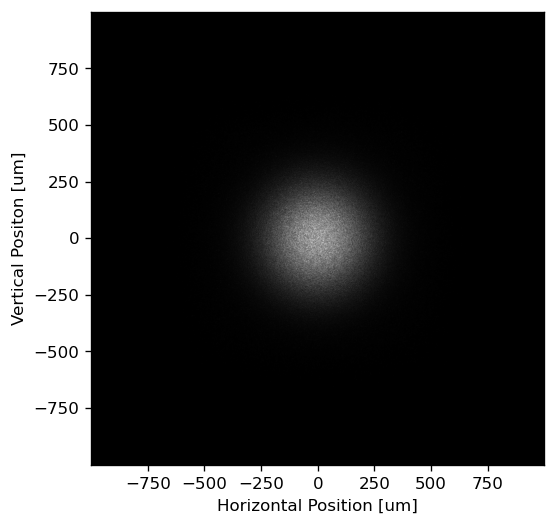

In [3]:
fig=plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
extent = (-Dx_m/2 * 1e6, +Dx_m/2 * 1e6, -Dx_m/2 * 1e6, +Dx_m/2 * 1e6)
plt.imshow(img, extent=extent, cmap = 'gray')

plt.xlabel('Horizontal Position [um]')
plt.ylabel('Vertical Positon [um]')
plt.show()

### Plot Power Spectrum density
The power spectrum density is the Fourier transform of the intensity detected at the camers

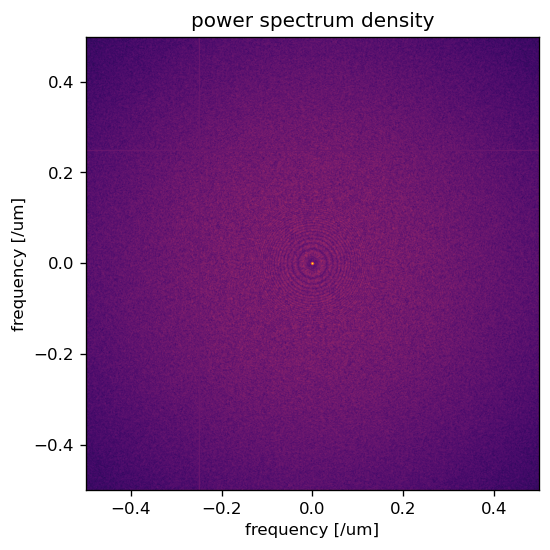

In [4]:
# take the Fourier Transform
IMG = sp.ft(img)


# removing zero frequencies (tend to dominate the signal), but just for display
IMG_d = IMG
IMG_d[498:503,:]=np.mean(abs(IMG))
IMG_d[:,498:503]=np.mean(abs(IMG))

# corresponding frequency scale
f_cpm = sp.fs(x_m)

# scale the plot
Df_cpm = f_cpm[-1]-f_cpm[0]
extent = (-Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6, -Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6) 

fig=plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.imshow(np.abs(IMG_d)**0.1, extent=extent, cmap = 'inferno')
plt.title('power spectrum density')
plt.xlabel('frequency [/um]')
plt.ylabel('frequency [/um]')
plt.show()

### Save the image
we want to save the image to process it later

In [5]:
from PIL import Image
# some scaling required
im = Image.fromarray(np.uint16(img/np.max(img)*(2**16-1)))

filename = "01_test"
im.save(filename + ".tiff", "TIFF")

### Read the image
We want to make sure nothing bad happened to the data (compression etc.)

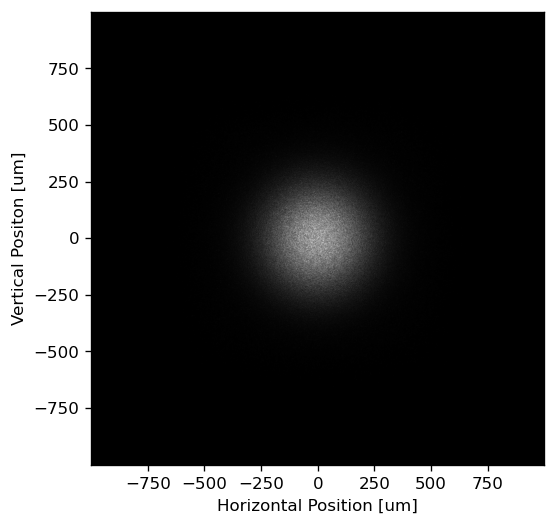

In [6]:
im_tiff = Image.open(filename+".tiff")
im_np = np.squeeze(np.array(im_tiff.getdata()).reshape(im_tiff.size[0], im_tiff.size[1], 1))

fig=plt.figure(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
extent = (-Dx_m/2 * 1e6, +Dx_m/2 * 1e6, -Dx_m/2 * 1e6, +Dx_m/2 * 1e6)
plt.imshow(im_np, extent=extent, cmap = 'gray')
plt.xlabel('Horizontal Position [um]')
plt.ylabel('Vertical Positon [um]')
plt.show()

In [7]:
np.max(im_np)

65535